### Code created for the clas Urban Informatics for Smart and Sustainable Cities.

#### Author: Adriano M. Yoshino - amy324@nyu.edu
The code aims to provide information to answer the operational question: Where is the Sensitive Infrastructure Located?
The question was answered in two ways:
- Looking for infrastructure in the Tornado path and calculating the damage exposure taking in consideration importance and sensitivity;
- For the tornado path, look for the trees that have more potential to generate damage to people, houses and cars. To do that, we filtered the trees that are closer to streets.

This notebook is then designed to calculate the second part. Count trees that has potentially can damage the city.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

### 1st: Finding the tornado path?

We are going to estimate the tornado path using the 311 complaint calls on the day (September 16th, 2010) that are related to issues caused by tornado. Mainly it is about damages to trees that are blocking the streets (this kind of complaint rose abnormaly in this day). 

To do this, we are going to use: 
- NYC 2010 Census Tracts:
https://www1.nyc.gov/site/planning/data-maps/open-data/bytes-archive.page
- NYC Open Data 311 Complaints:
https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

The map with Census Tracts will guide this analysis serving as an index to merge all other information obtained. 

#### I downloaded the NYC Shapefile and saved in a folder called CT_Shape

In [2]:
boroCT = gpd.read_file('CT_Shape/ct_shape.shp')

In [3]:
boroCT.head(3)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...
2,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...


#### The 311 calls were filtered by date (for September 16th, 2010) and downloaded as .csv 

In [4]:
calls = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [5]:
calls = calls[[u'Unique Key', u'Created Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name',
       u'City', u'Landmark', u'Facility Type', u'Status',
       u'Park Borough',
       u'Latitude', u'Longitude', u'Location']]

In [6]:
calls = calls[calls['Complaint Type'] == 'Damaged Tree']

In [8]:
# Transforming 311 dataset into a GeoDataFrame
geometry = [Point(x) for x in zip(calls.Longitude, calls.Latitude)]

crs = {'init': 'epsg:4326'}
calls_shp = gpd.GeoDataFrame(calls, crs=crs, geometry=geometry)

calls_shp.head(3)

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Landmark,Facility Type,Status,Park Borough,Latitude,Longitude,Location,geometry
1848,18690047,09/15/2010 07:09:16 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11373.0,NaN,NaN,ELMHURST,NaN,NaN,Closed,QUEENS,40.733418,-73.877720,"(40.73341751681816, -73.87771961432011)",POINT (-73.8777196143201 40.73341751681816)
1870,18690043,09/15/2010 07:26:56 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11385.0,18-74 MENAHAN STREET,MENAHAN STREET,RIDGEWOOD,NaN,NaN,Closed,QUEENS,40.706010,-73.909163,"(40.70600998542134, -73.90916330103076)",POINT (-73.90916330103077 40.70600998542135)
1906,18690046,09/15/2010 07:46:53 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11385.0,18-74 MENAHAN STREET,MENAHAN STREET,RIDGEWOOD,NaN,NaN,Closed,QUEENS,40.706010,-73.909163,"(40.70600998542134, -73.90916330103076)",POINT (-73.90916330103077 40.70600998542135)


In [9]:
# Separating the borroughs that were affected (Brooklyn, Queens and Staten Island)
callsBRQU = calls_shp[(calls_shp['Park Borough'] != 'MANHATTAN') & \
                      (calls_shp['Park Borough'] != 'BRONX')]
callsBRQU = callsBRQU[(callsBRQU['City'] != 'NEW YORK') & \
                       (callsBRQU['City'] != 'BRONX')]

In [10]:
callsBRQU.head(3)

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Landmark,Facility Type,Status,Park Borough,Latitude,Longitude,Location,geometry
1848,18690047,09/15/2010 07:09:16 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11373.0,NaN,NaN,ELMHURST,NaN,NaN,Closed,QUEENS,40.733418,-73.877720,"(40.73341751681816, -73.87771961432011)",POINT (-73.8777196143201 40.73341751681816)
1870,18690043,09/15/2010 07:26:56 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11385.0,18-74 MENAHAN STREET,MENAHAN STREET,RIDGEWOOD,NaN,NaN,Closed,QUEENS,40.706010,-73.909163,"(40.70600998542134, -73.90916330103076)",POINT (-73.90916330103077 40.70600998542135)
1906,18690046,09/15/2010 07:46:53 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11385.0,18-74 MENAHAN STREET,MENAHAN STREET,RIDGEWOOD,NaN,NaN,Closed,QUEENS,40.706010,-73.909163,"(40.70600998542134, -73.90916330103076)",POINT (-73.90916330103077 40.70600998542135)


#### Plotting the related 311 calls

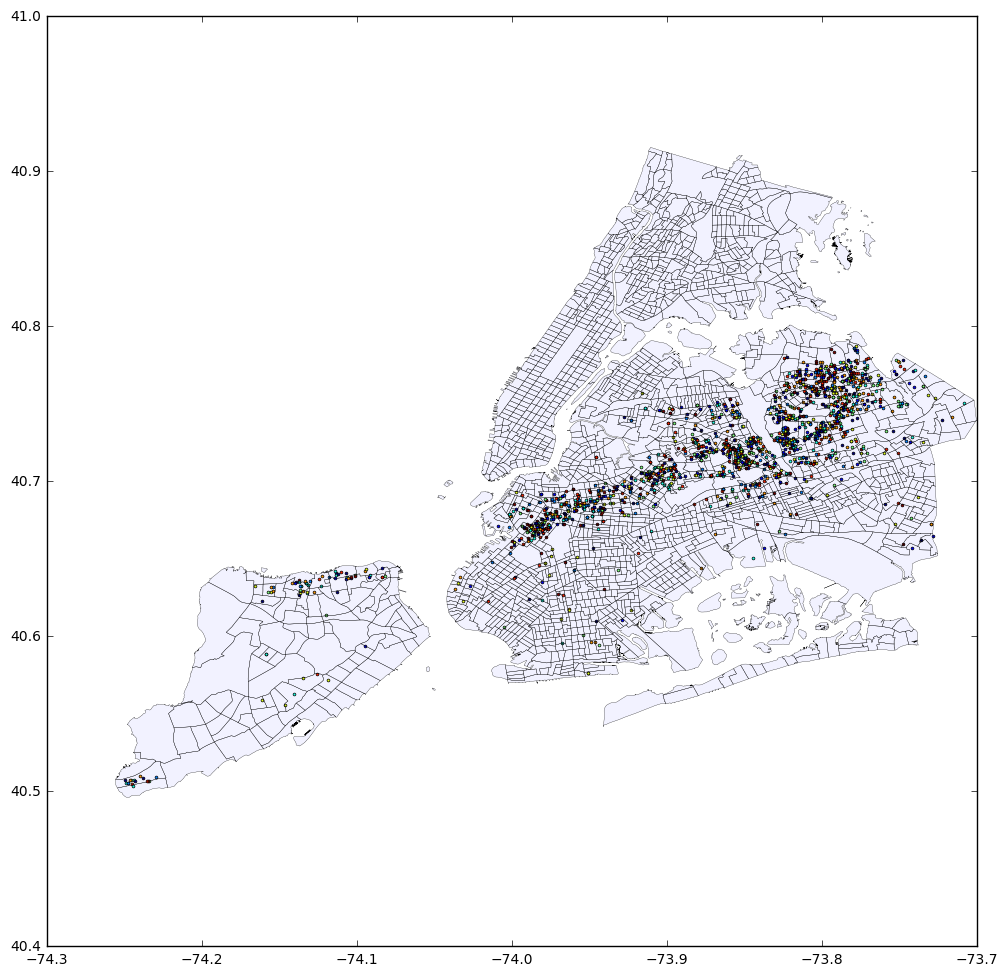

In [16]:
# Plotting the complaints and the basemap (NYC Shapelfile for Census Tracts 2010)
f, ax = plt.subplots(figsize=(12,12))
callsBRQU.plot( markersize=2, ax = ax)
boroCT.plot(alpha=0.05, linewidth=0.2, facecolor = None, ax = ax)

<center>** Figure 1: Complaint points over the basemap (Census Tracts 2010) **</center>

#### To separate just the census tracts that were impacted, and create our study domain, lets mark all census tracts that expressed at least one complaint about the tornado.

In [17]:
a=[] # create a list a and append the census tracts correspondent to the point of the 311 complaint
for i in range(len(callsBRQU)):
    try:
        a.append(boroCT[boroCT.geometry.intersects \
                (callsBRQU.iloc[i].geometry.centroid)].values[0][0])
    except IndexError:
        a.append(0)
    #print '\r', '%',str((i+1)*100./len(callsBRQU))

In [18]:
# Saving list of census tracts that presented at least one complaint
np.save('311_CT.npy', a)

In [19]:
# Creating a column on 311 dataset with the information of census tract
callsBRQU['Census Tract'] = a

In [20]:
# Create a column of number of complaints for each census tracts and then 
# add a column with this information
countCT = dict(callsBRQU['Census Tract'].value_counts().astype(int))
countCT[0] = 0
callsBRQU['CountCT'] = callsBRQU['Census Tract']
callsBRQU['CountCT'].replace(countCT, inplace=True)

In [21]:
callsBRQU.head()

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Landmark,Facility Type,Status,Park Borough,Latitude,Longitude,Location,geometry,Census Tract,CountCT
1848,18690047,09/15/2010 07:09:16 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11373.0,NaN,NaN,...,NaN,NaN,Closed,QUEENS,40.733418,-73.877720,"(40.73341751681816, -73.87771961432011)",POINT (-73.8777196143201 40.73341751681816),4047500,1
1870,18690043,09/15/2010 07:26:56 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11385.0,18-74 MENAHAN STREET,MENAHAN STREET,...,NaN,NaN,Closed,QUEENS,40.706010,-73.909163,"(40.70600998542134, -73.90916330103076)",POINT (-73.90916330103077 40.70600998542135),4059100,4
1906,18690046,09/15/2010 07:46:53 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11385.0,18-74 MENAHAN STREET,MENAHAN STREET,...,NaN,NaN,Closed,QUEENS,40.706010,-73.909163,"(40.70600998542134, -73.90916330103076)",POINT (-73.90916330103077 40.70600998542135),4059100,4
1976,18690045,09/15/2010 08:15:10 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,11204.0,54 STREET,54 STREET,...,NaN,NaN,Closed,BROOKLYN,40.623429,-73.980465,"(40.62342909456914, -73.98046464771639)",POINT (-73.98046464771639 40.62342909456914),3046800,1
2007,18690037,09/15/2010 08:26:45 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch Cracked and Will Fall,Street,11214.0,NaN,NaN,...,NaN,NaN,Closed,BROOKLYN,40.606015,-74.005168,"(40.60601492456077, -74.00516797310992)",POINT (-74.00516797310992 40.60601492456077),3017800,1


#### Adding a column on basemap of the number of calls for each Census Tract

In [22]:
boroCT['countCT'] = boroCT['BoroCT2010']

In [23]:
boroCT['countCT'].replace(countCT, inplace=True)

In [24]:
b = []
for i in range(0, len(boroCT['countCT'])):
    if type(boroCT['countCT'][i]) == unicode:
        b.append(0)
    else:
        b.append(boroCT['countCT'][i])
boroCT['countCT'] = b

In [25]:
boroCT.head(2)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,countCT
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...,0
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...,0


In [26]:
boroBKQUSI = boroCT[(boroCT['BoroCode'] == '3') | 
                    (boroCT['BoroCode'] == '4') | 
                    (boroCT['BoroCode'] == '5')]

#### plotting with a colormap the tracts that were impacted by the tornado (darker means higher impact)

(-74.299999999999997,
 -73.699999999999989,
 40.450000000000003,
 40.850000000000001)

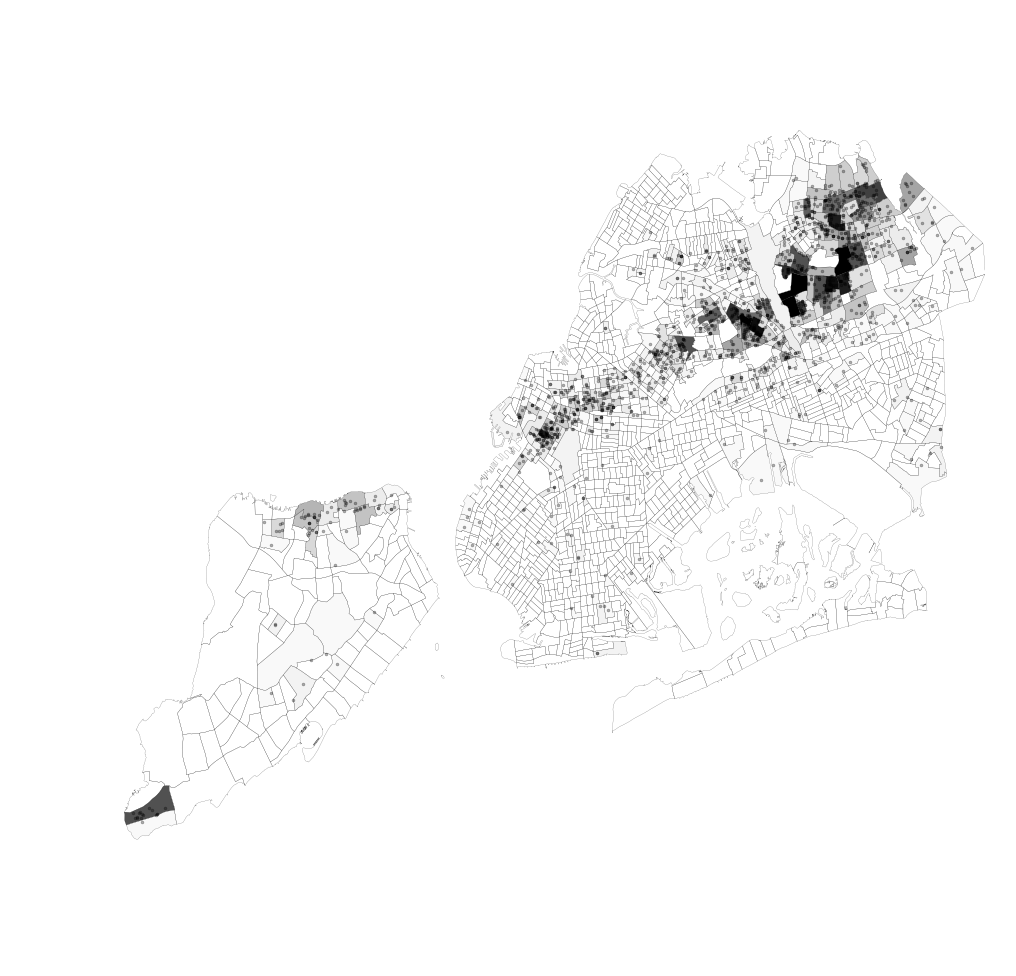

In [33]:
f, ax = plt.subplots(figsize=(12,12))
callsBRQU.plot(markersize=2, color = 'k', alpha = 0.3, ax = ax)
boroBKQUSI.plot(column = 'countCT', alpha = 1.0, cmap = 'Greys',
                vmin=0.0, vmax=20.0, linewidth=0.1,
                ax = ax)

plt.axis('off')

<center>** Figure 2: Census tracts that were more impacted by tornado. Darker areas presented more complaint calls than light ones **</center>

#### To not leave some tracks empty in surrounded by others that were impacted, we draw a boundary in ArcGIS and the result is below:

In [34]:
locationGIS = pd.read_csv('location_coef.csv')
locationGIS = locationGIS[[u'BoroCT2010', u'geometry', u'Score']]

In [36]:
unic = locationGIS['BoroCT2010'].astype(unicode)
locationGIS['BoroCT2010'] = unic

In [37]:
# Create dictionary for each census tract to apply to a ct column and get the labels for the map
dic = {}
for i in range(len(locationGIS)):
    dic[locationGIS['BoroCT2010'][i]] = locationGIS['Score'][i]

In [38]:
boroCT['Score'] = boroCT['BoroCT2010']
boroCT['Score'].replace(dic, inplace = True)

b = []
for i in range(0, len(boroCT['Score'])):
    if type(boroCT['Score'][i]) == unicode:
        b.append(0)
    else:
        b.append(boroCT['Score'][i])
boroCT['Score'] = b


(-74.299999999999997,
 -73.699999999999989,
 40.400000000000006,
 41.000000000000007)

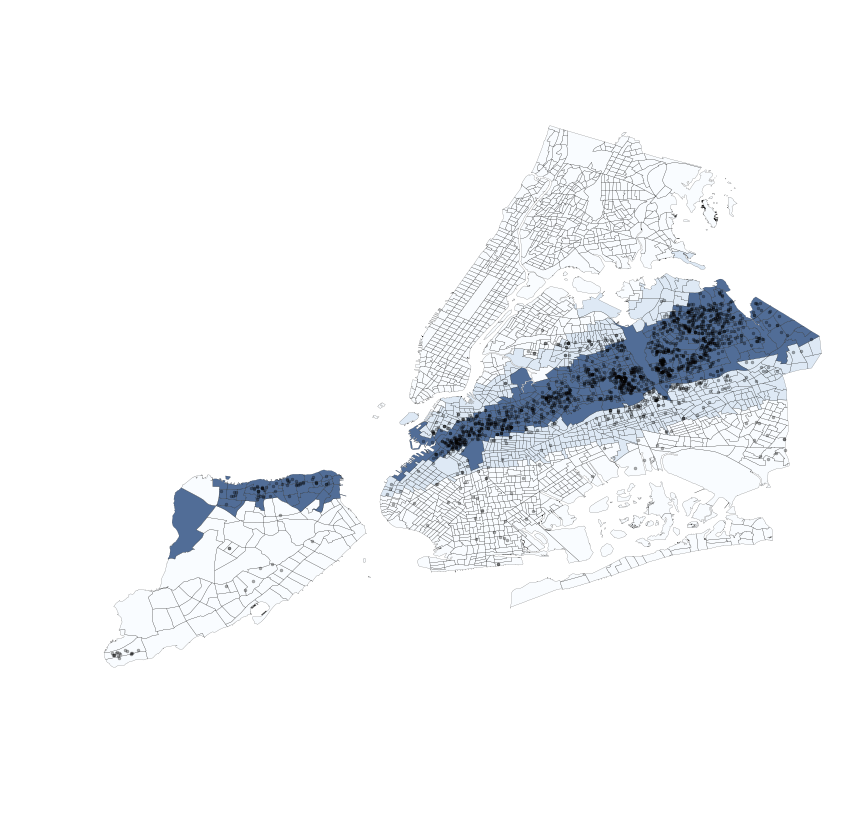

In [40]:
f, ax = plt.subplots(figsize=(10,10))
callsBRQU.plot(markersize=2, color = 'k', alpha = 0.3, ax = ax)
boroCT.plot(column = 'Score', alpha = 0.7, cmap = 'Blues',linewidth=0.1, ax = ax)

plt.axis('off')

<center> ** Figure 3: the dark area represents the tracts that were more impacted by the tornado, and the light blue area is where the impact happened but not so intensely than the dark blue area ** </center>

### 2nd: Let's filter the streets and roads on impacted areas to see which trees are close enough to be considered as a potential danger.

The dataset used in this part is:
- NYC Open Data - Roadbed: https://data.cityofnewyork.us/City-Government/Roadbed/xgwd-7vhd

#### Opening the roadbed

In [41]:
roadbed = gpd.read_file('Roadbed/geo_export_cfa6905c-a94d-45b2-8832-2a8703dbb75d.shp')

In [42]:
roadbed.head()

,feat_code,geometry,shape_area,shape_leng,source_id,status,sub_code
0,3500.0,POLYGON ((-73.74583007946832 40.67412133367768...,17622.102659,1309.508898,7.350000e+09,Unchanged,350000.0
1,3500.0,POLYGON ((-73.74498649934228 40.67381774813924...,17841.044870,1327.784561,7.350000e+09,Unchanged,350000.0
2,3500.0,POLYGON ((-73.74144494983784 40.67444596937766...,17521.007784,1351.065313,7.350000e+09,Unchanged,350000.0
3,3500.0,POLYGON ((-73.73620636222137 40.67445967119856...,16233.059225,1232.404184,7.350000e+09,Unchanged,350000.0
4,3500.0,POLYGON ((-73.74045550161146 40.67411428040665...,2432.017445,198.431125,7.350000e+09,Unchanged,350010.0


In [43]:
roadbed.crs = crs
boroTornado = boroCT[(boroCT['Score'] != 0)]

#### Filtering roads inside the census tracts impacted by the tornado

In [472]:
# Filtering roads inside the census tracts impacted by the tornado
road_imp=[]
indice = []
for i in range(len(roadbed)):
    try:
        road_imp.append(boroTornado[boroTornado.geometry.intersects \
                (roadbed.iloc[i].geometry.centroid)].values[0][0])
        indice.append(i)
    except IndexError:
        road_imp.append(0)
    if i%777 == 0:
        print '\r', '%',str((i+1)*100./len(roadbed))

% 0.00108232136286
% 0.842046020304
% 1.68300971925
% 2.52397341819
% 3.36493711713
% 4.20590081607
% 5.04686451501
% 5.88782821395
% 6.72879191289
% 7.56975561184
% 8.41071931078
% 9.25168300972
% 10.0926467087
% 10.9336104076
% 11.7745741065
% 12.6155378055
% 13.4565015044
% 14.2974652034
% 15.1384289023
% 15.9793926013
% 16.8203563002
% 17.6613199991
% 18.5022836981
% 19.343247397
% 20.184211096
% 21.0251747949
% 21.8661384938
% 22.7071021928
% 23.5480658917
% 24.3890295907
% 25.2299932896
% 26.0709569885
% 26.9119206875
% 27.7528843864
% 28.5938480854
% 29.4348117843
% 30.2757754833
% 31.1167391822
% 31.9577028811
% 32.7986665801
% 33.639630279
% 34.480593978
% 35.3215576769
% 36.1625213758
% 37.0034850748
% 37.8444487737
% 38.6854124727
% 39.5263761716
% 40.3673398706
% 41.2083035695
% 42.0492672684
% 42.8902309674
% 43.7311946663
% 44.5721583653
% 45.4131220642
% 46.2540857631
% 47.0950494621
% 47.936013161
% 48.77697686
% 49.6179405589
% 50.4589042579
% 51.2998679568
% 52.140831

In [476]:
# Saving auxiliar index to not run the code again later if needed.
np.save('index_ImpactedbyTornado.npy', indice)
np.save('CT_ImpactedbyTornado.npy', road_imp)

In [91]:
roadbed['CensusTract'] = road_imp

In [92]:
roadTornado = roadbed.iloc[indice,:]

In [93]:
roadTornado.head()

,feat_code,geometry,shape_area,shape_leng,source_id,status,sub_code,CensusTract
38,3500.0,POLYGON ((-73.77181189404376 40.69517222095623...,1451.504591,155.715408,7.350000e+09,Unchanged,350010.0,4042400
39,3500.0,"POLYGON ((-73.7718759146301 40.70459874506789,...",2452.608284,228.353872,7.350000e+09,Unchanged,350010.0,4040400
43,3500.0,POLYGON ((-73.77221031303982 40.69444967096134...,20124.649032,1405.267141,7.350000e+09,Unchanged,350000.0,4042400
45,3500.0,POLYGON ((-73.77330693360861 40.70271608185058...,27086.913162,1963.114866,7.350000e+09,Unchanged,350000.0,4040400
46,3500.0,POLYGON ((-73.77173964568273 40.70469442384936...,8772.789433,663.293078,7.350000e+09,Unchanged,350000.0,4040400


#### Plotting roadbed

(-74.299999999999997,
 -73.599999999999994,
 40.450000000000003,
 40.850000000000001)

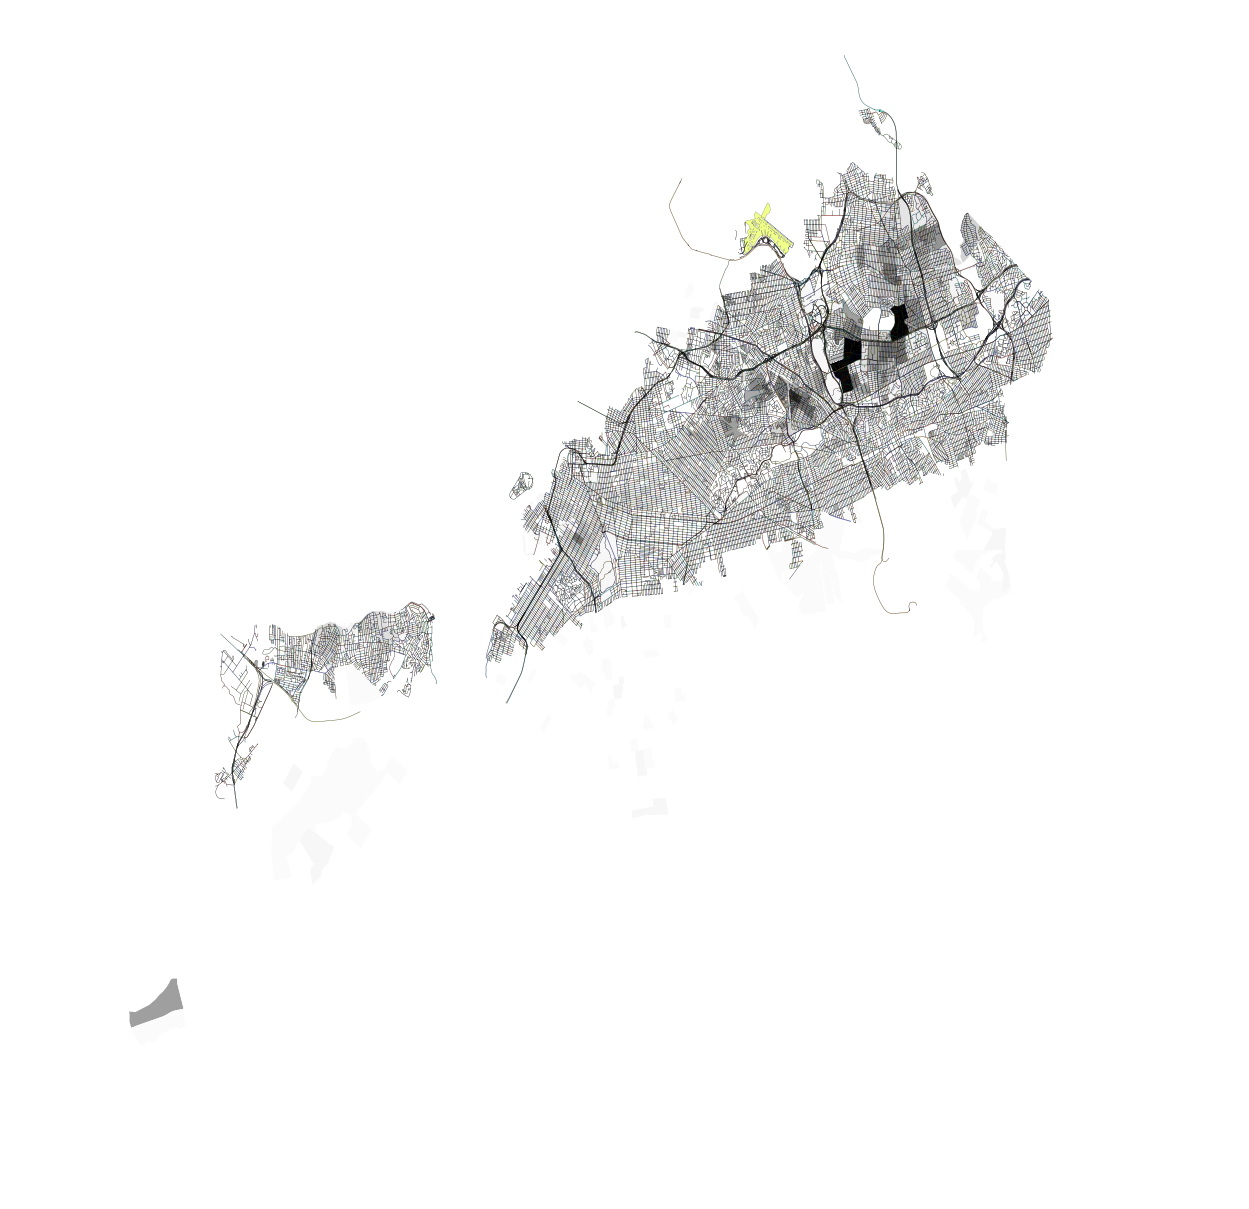

In [51]:
f, ax = plt.subplots(figsize=(15,15))
#callsBRQU.plot(markersize=3, color = 'k', alpha = 0.3, ax = ax)
boroBKQUSI.plot(column = 'countCT', alpha = 1.0, cmap = 'Greys',
                linewidth=0.0, ax = ax)
roadTornado.plot(linewidth=0.1, ax = ax)

plt.axis('off')

<center> ** Figure 4: Plot of Roadbed for the impacted area** </center>

### 3rd: NYC Trees Census 

- NYC Open Data - 2015 Tree Map:
https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35/data


In [52]:
trees = gpd.read_file('../../../../../Downloads/2015 Street Tree Census - Tree Data.geojson')

In [56]:
trees = trees[(trees['borocode'] == '3') | 
                    (trees['borocode'] == '4') | 
                    (trees['borocode'] == '5')]

In [53]:
trees = trees[[u'boro_ct',u'geometry', u'latitude',
            u'longitude', u'zipcode']]

In [55]:
trees.head()

,boro_ct,geometry,latitude,longitude,zipcode
0,4073900,POINT (-73.84421521958048 40.72309177392427),40.72309177,-73.84421522,11375
1,4097300,POINT (-73.81867945834878 40.79411066708779),40.79411067,-73.81867946,11357
2,3044900,POINT (-73.93660770459083 40.71758074009912),40.71758074,-73.9366077,11211
3,3044900,POINT (-73.93445615919741 40.71353749483323),40.71353749,-73.93445616,11211
4,3016500,POINT (-73.97597938483258 40.66677775537875),40.66677776,-73.97597938,11215


In [415]:
trees.to_file('trees.shp', driver='ESRI Shapefile')

In [57]:
trees = gpd.read_file('trees.shp')

In [421]:
a=[]
ind = []
for i in range(len(trees)):
    try:
        a.append(boroTornado[boroTornado.geometry.intersects \
                (trees.iloc[i].geometry.centroid)].values[0][0])
        ind.append(i)
    except IndexError:
        a.append(0)
    if i%777 == 0:
        print '\r', '%',str((i+1)*100./len(trees))

% 0.000187560253732
% 0.145921877403
% 0.291656194552
% 0.437390511702
% 0.583124828851
% 0.728859146001
% 0.87459346315
% 1.0203277803
% 1.16606209745
% 1.3117964146
% 1.45753073175
% 1.6032650489
% 1.74899936605
% 1.8947336832
% 2.04046800035
% 2.18620231749
% 2.33193663464
% 2.47767095179
% 2.62340526894
% 2.76913958609
% 2.91487390324
% 3.06060822039
% 3.20634253754
% 3.35207685469
% 3.49781117184
% 3.64354548899
% 3.78927980614
% 3.93501412329
% 4.08074844044
% 4.22648275759
% 4.37221707474
% 4.51795139188
% 4.66368570903
% 4.80942002618
% 4.95515434333
% 5.10088866048
% 5.24662297763
% 5.39235729478
% 5.53809161193
% 5.68382592908
% 5.82956024623
% 5.97529456338
% 6.12102888053
% 6.26676319768
% 6.41249751483
% 6.55823183198
% 6.70396614913
% 6.84970046627
% 6.99543478342
% 7.14116910057
% 7.28690341772
% 7.43263773487
% 7.57837205202
% 7.72410636917
% 7.86984068632
% 8.01557500347
% 8.16130932062
% 8.30704363777
% 8.45277795492
% 8.59851227207
% 8.74424658922
% 8.88998090637
% 9

In [422]:
np.save('trees_CT.npy', a)
np.save('index_trees.npy', ind)

In [61]:
trees = trees.reset_index(drop=True)

In [62]:
treImpact = trees.iloc[ind, :]

In [63]:
treImpact.head()

,boro_ct,geometry,latitude,longitude,zipcode
0,4073900,POINT (-73.84421521958048 40.72309177392427),40.72309177,-73.84421522,11375
1,4097300,POINT (-73.81867945834878 40.79411066708779),40.79411067,-73.81867946,11357
2,3044900,POINT (-73.93660770459083 40.71758074009912),40.71758074,-73.9366077,11211
3,3044900,POINT (-73.93445615919741 40.71353749483323),40.71353749,-73.93445616,11211
4,3016500,POINT (-73.97597938483258 40.66677775537875),40.66677776,-73.97597938,11215


In [64]:
buf = treImpact['geometry'].buffer(2.5)
treImpact['buffer'] = buf

/Users/adrianoyoshino/anaconda/envs/snakes/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [65]:
treImpact.columns

Index([u'boro_ct', u'geometry', u'latitude', u'longitude', u'zipcode',
       u'buffer'],
      dtype='object')

In [66]:
treIm = treImpact[[u'boro_ct', u'latitude', u'longitude', u'zipcode',
       u'buffer']]
treIm.columns = [u'boro_ct', u'latitude', u'longitude', u'zipcode',
       u'geometry']

In [67]:
treIm = gpd.GeoDataFrame(treIm, geometry = 'geometry', crs = crs)

In [452]:
treIm.to_file('treesImpactedArea.shp', driver='ESRI Shapefile')

In [68]:
treIm.head()

,boro_ct,latitude,longitude,zipcode,geometry
0,4073900,40.72309177,-73.84421522,11375,POLYGON ((-71.34421521958048 40.72309177392427...
1,4097300,40.79411067,-73.81867946,11357,POLYGON ((-71.31867945834878 40.79411066708779...
2,3044900,40.71758074,-73.9366077,11211,POLYGON ((-71.43660770459083 40.71758074009912...
3,3044900,40.71353749,-73.93445616,11211,POLYGON ((-71.43445615919741 40.71353749483323...
4,3016500,40.66677776,-73.97597938,11215,POLYGON ((-71.47597938483258 40.66677775537875...


### 4th: Now Let's see which trees intersect with the roads and add it to a list "t".

In [501]:
t=[]
indtree = []
for i in range(len(treIm)):
    roadtree = roadTornado[roadTornado['CensusTract'] == treIm.iloc[i]['boro_ct']]
    try:
        t.append(roadtree[roadtree.geometry.intersects \
                (treIm.iloc[i].geometry.centroid)].values[0][-1])
        indtree.append(i)
    except IndexError:
        t.append(0)
    if i%777 == 0:
        print '\r', '%',str((i+1)*100./len(treIm))

% 0.000365067427954
% 0.284022458948
% 0.567679850468
% 0.851337241989
% 1.13499463351
% 1.41865202503
% 1.70230941655
% 1.98596680807
% 2.26962419959
% 2.55328159111
% 2.83693898263
% 3.12059637415
% 3.40425376567
% 3.68791115719
% 3.97156854871
% 4.25522594023
% 4.53888333175
% 4.82254072327
% 5.10619811479
% 5.38985550631
% 5.67351289783
% 5.95717028935
% 6.24082768087
% 6.52448507239
% 6.80814246391
% 7.09179985543
% 7.37545724695
% 7.65911463847
% 7.94277202999
% 8.22642942151
% 8.51008681303
% 8.79374420455
% 9.07740159607
% 9.3610589876
% 9.64471637912
% 9.92837377064
% 10.2120311622
% 10.4956885537
% 10.7793459452
% 11.0630033367
% 11.3466607282
% 11.6303181198
% 11.9139755113
% 12.1976329028
% 12.4812902943
% 12.7649476858
% 13.0486050774
% 13.3322624689
% 13.6159198604
% 13.8995772519
% 14.1832346434
% 14.466892035
% 14.7505494265
% 15.034206818
% 15.3178642095
% 15.601521601
% 15.8851789926
% 16.1688363841
% 16.4524937756
% 16.7361511671
% 17.0198085586
% 17.3034659502
% 17.

In [ ]:
np.save('index_trees_intersectRoadbed.npy', indtree)

In [70]:
treeStreets = treIm.iloc[indtree, :]

#### From each tree buffer that intersect with road, let's get the centroid point to plot 

In [71]:
treeStreets['centroid'] = treeStreets.geometry.centroid

/Users/adrianoyoshino/anaconda/envs/snakes/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [72]:
treeStreets.head()

,boro_ct,latitude,longitude,zipcode,geometry,centroid
30,4014000,40.70404652,-73.82768034,11415,POLYGON ((-71.32768034198298 40.70404651889878...,POINT (-73.82768034198297 40.70404651889875)
47,4097300,40.793138,-73.81946649,11357,POLYGON ((-71.31946649097343 40.79313800420383...,POINT (-73.81946649097338 40.79313800420383)
73,4114100,40.76762905,-73.79811408,11358,POLYGON ((-71.29811408031267 40.76762905294378...,POINT (-73.79811408031267 40.76762905294375)
79,4114100,40.76760837,-73.7978701,11358,POLYGON ((-71.29787010490064 40.76760836649434...,POINT (-73.79787010490062 40.76760836649434)
81,4084900,40.75465185,-73.83342753,11355,POLYGON ((-71.33342753060359 40.75465185367967...,POINT (-73.83342753060352 40.75465185367965)


#### Trick to change the geometry feature on geopandas to the column centroid

In [73]:
newTree = gpd.GeoDataFrame(treeStreets, geometry = 'centroid', crs = crs)

In [74]:
newTree['CensusTract'] = newTree['boro_ct']

In [ ]:
newTree.to_file('TreesCountStreets.shp')

In [76]:
tree_dict = dict(newTree['CensusTract'].value_counts())

In [77]:
boroCT['TreeCount'] = boroCT['BoroCT2010']
boroCT['TreeCount'].replace(tree_dict, inplace = True)


#### Creating a trees count column to plot

In [78]:
b = []
for i in range(0, len(boroCT['TreeCount'])):
    if type(boroCT['TreeCount'][i]) == unicode:
        b.append(0)
    else:
        b.append(boroCT['TreeCount'][i])
boroCT['TreeCount'] = b

In [79]:
boroCT.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,countCT,Score,TreeCount
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...,0,5.0,48
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...,0,5.0,38
2,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...,0,5.0,7
3,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...,0,0.0,0
4,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,...",0,0.0,0


### 5th: Plot Results

(-74.299999999999997,
 -73.699999999999989,
 40.400000000000006,
 41.000000000000007)

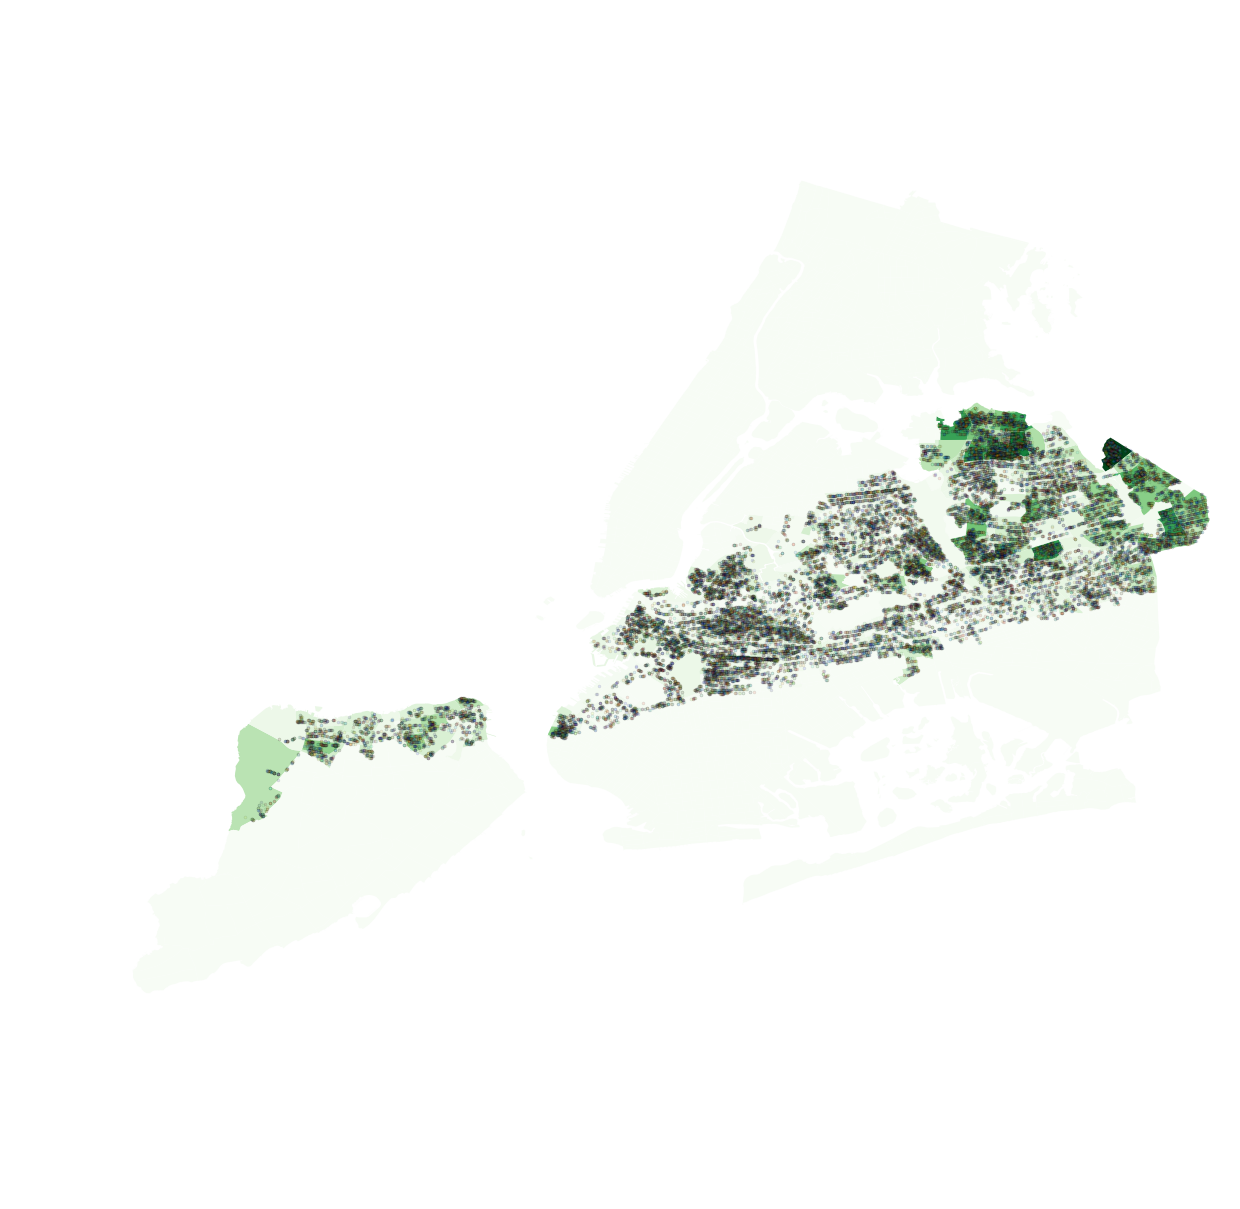

In [548]:
f, ax = plt.subplots(figsize=(15,15))
newTree.plot(alpha = 0.1, c = 'green', ax = ax)
boroCT.plot(column = 'TreeCount', alpha = 1.0, cmap = 'Greens',linewidth=0.0, ax = ax)

plt.axis('off')


<center>** Figure 5: Trees on impacted area that are close to streets (buffer of 2.5 m) **</center>

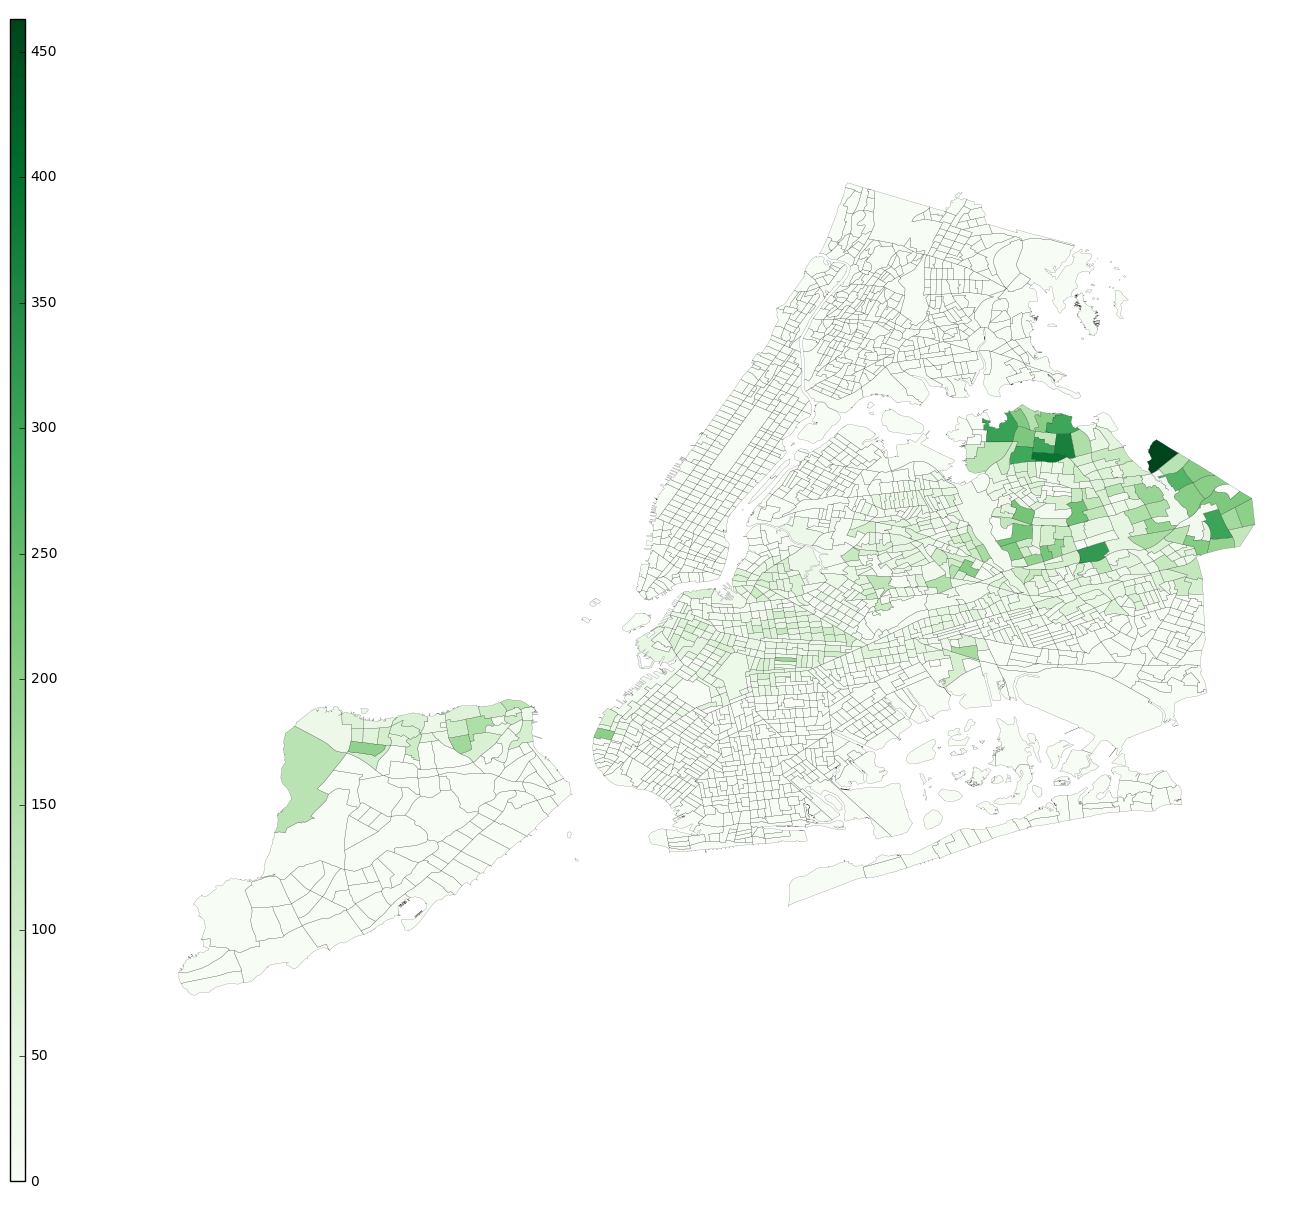

In [542]:
f, ax = plt.subplots(figsize=(15,15))
#newTree.plot(alpha = 0.5, c = 'green', ax = ax)
boroCT.plot(column = 'TreeCount', alpha = 1.0, cmap = 'Greens',linewidth=0.1, ax = ax)

plt.axis('off')

fig = ax.get_figure()
cax = fig.add_axes([0.07, 0.125, 0.01, 0.775])
sm = plt.cm.ScalarMappable(cmap='Greens', 
                           norm=plt.Normalize(vmin=0, 
                                              vmax=boroCT['TreeCount'].max()))
sm._A = []
fig.colorbar(sm, cax=cax)
cm.tick_params(labelsize=12) 

<center>** Figure 6: Census tracts that present more trees close to streets (buffer of 2.5 m) **</center>

#### 10 Census tracts that present more trees close to streets. All of those are in Queens Borough as we can notice by dark green areas on map plot.

In [555]:
boroCT[[u'BoroCT2010', u'TreeCount']].sort('TreeCount', ascending=False)[:10]

/Users/adrianoyoshino/anaconda/envs/snakes/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,BoroCT2010,TreeCount
1638,4148300,463
769,4105900,389
993,4101700,368
1414,4127700,319
1456,4094500,306
1072,4157101,301
767,4103300,300
1916,4099100,297
1085,4104700,294
1576,4150701,268


In [543]:
boroCT.to_file('BoroTrees.shp', driver='ESRI Shapefile')

(-73.816000000000003,
 -73.801999999999992,
 40.775000000000006,
 40.785000000000004)

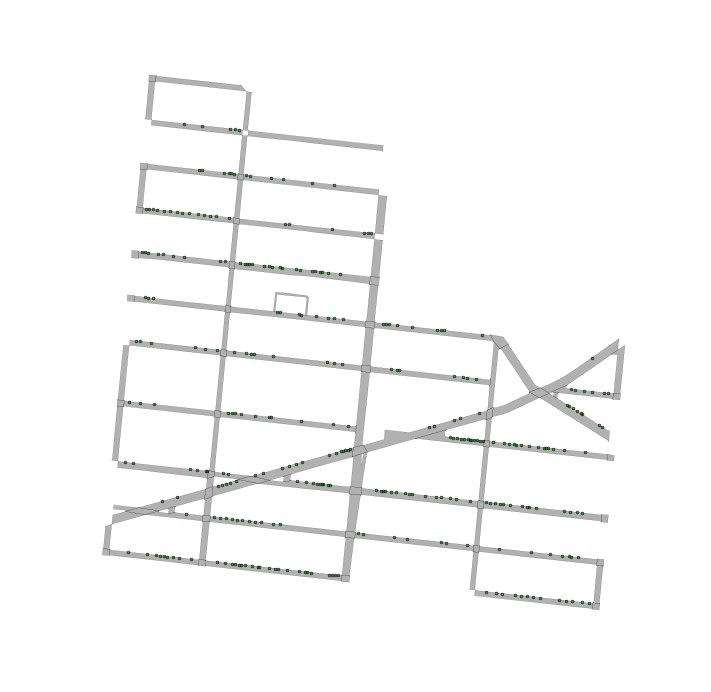

In [110]:
f, ax = plt.subplots(figsize=(8,8))
newTree[newTree['CensusTract'] == '4103300'].plot(alpha = 0.7, ms = 4, color = 'green', ax = ax)
roadTornado[roadTornado['CensusTract'] == '4103300'].plot(linewidth=0.1, alpha = 0.3, facecolor = 'k', ax = ax)

plt.axis('off')

<center>** Figure 7: Example plot - Trees and streets plot (Census Tract = 4103300) (buffer of 2.5 m) **</center>